Run the cell below before doing anything else!

In [1]:
!pip3 install coolprop
!pip3 install --upgrade git+https://github.com/ptgodart/nasaPoly.git
%matplotlib inline

     |████████████████████████████████| 4.2 MB 27.1 MB/s 
  Cloning https://github.com/ptgodart/nasaPoly.git to /tmp/pip-req-build-_n5n5zwd
  Running command git clone -q https://github.com/ptgodart/nasaPoly.git /tmp/pip-req-build-_n5n5zwd
  Created wheel for nasaPoly: filename=nasaPoly-0.0.1-py3-none-any.whl size=275524 sha256=eea7ac2b26255f279e4f7b42a6ad38980f277e7e2849b5b2ce5e9f21fd147f65
  Stored in directory: /tmp/pip-ephem-wheel-cache-foixwzu1/wheels/0d/3b/36/9129e6f4450281e6d729bb6c955067eab00b0c9c63a572818c
Successfully built nasaPoly


# Simulating Thermodynamic Cycles and Carbon Intensity

**Goal**: compute the carbon intensity of a gasoline-powered Stirling engine in order to estimate the amount of carbon dioxide that could be saved by switching to a renewable source of heat. 

This exercise focuses on the Stirling Engine, a type of *external comubustion engine*, which runs on the Stirling Cycle. This cycle can be described by the following processes:

*   $1\rightarrow2$: Isothermal compression at $T_L$
*   $2\rightarrow3$: Isochoric heating to $T_H$
*   $3\rightarrow4$: Isothermal expansion at $T_H$
*   $4\rightarrow1$: Isochoric cooling to $T_L$

These states plotted on a P-V and T-S diagram looks like the following:

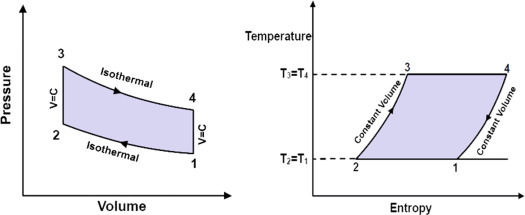

One physical manifestation of this Stirling Engine is depicted below:

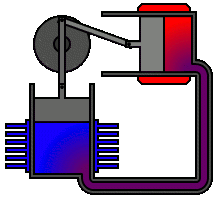

For this cycle, please answer the following questions:

1. What is the adiabatic flame temperature of gasoline combustion in air at 1 atm?

2. What is the net work done in a single Stirling Cycle? Assume the following:

  * The working fluid is 1 kg of air
  * $T_H$ is equal to the adiabatic flame temperature computed in Question 1
  * $T_L = 300$ K
  * $P_1 = 101325$ Pa (1 atm)
  * $P_2 = 200000$ Pa

  *Bonus: Recreate the above PV and TS diagrams using Python. Use air as a working fluid.*

3. What is the required thermal energy input for each cycle? (i.e. compute $Q_{in} = Q^{2\rightarrow3}+Q^{3\rightarrow4}$)

4. How do your answers to Questions 2 and 3 change with with $P_2$? (i.e. plot $W_{net}$ and $Q_{in}$ as a function of $P_2$)

5. What is the first law efficiency of the ideal Stirling Cycke? (i.e. compute $\eta_I = W_{net}/Q_{in}$). How does it compare to the Carnot efficiency?

6. What is the carbon intensity of the Stirling Cycle? (*Hint: final answer should be in units of kg CO$_2$/J of net work*)

7. Roughly how much CO$_2$ would be emitted annually if all of the world's power needs were met by this process?

## Question 1:

What is the adiabatic flame temperature of gasoline combustion in air? Assume the following stoichiometry:

$C_8H_{18} + 12.5\, (O_2 + 3.77\, N_2) \rightarrow 8\, CO_2 + 9\, H_2O + 47.125\, N_2$

(*Hint: See the solution to the Challenge Problem in Problem Set 2*)

In [2]:
import nasaPoly
from scipy.optimize import fminbound
import numpy as np

Gasoline = nasaPoly.Species('C8H18,n-octane')
CO2 = nasaPoly.Species('CO2')
O2 = nasaPoly.Species('O2')
N2 = nasaPoly.Species('N2')
H2O = nasaPoly.Species('H2O')

# Insert code here:

# Compute T_H:
T_1 = 300 # K
delta_H_rxn = lambda T_2: np.abs((8*CO2.h_0(T_2) + 9*H2O.h_0(T_2) + 47.125*N2.h_0(T_2)) - \
                (Gasoline.h_0(T_1) + 12.5*(O2.h_0(T_1) + 3.77*N2.h_0(T_1))))
T_H = fminbound(delta_H_rxn, 300, 6000)
print(f'T_H={T_H:.4g} K')

T_rxn = (T_1 + T_H)/2
h_rxn = np.abs((8*CO2.h_0(T_rxn) + 9*H2O.h_0(T_rxn) + 47.125*N2.h_0(T_rxn)) - \
                (Gasoline.h_0(T_rxn) + 12.5*(O2.h_0(T_rxn) + 3.77*N2.h_0(T_rxn)))) / (Gasoline.molecular_wt*1e-3) # J/kg C8H18
kg_CO2_per_kg_gas = 8*(CO2.molecular_wt*1e-3)/(1*(Gasoline.molecular_wt*1e-3))

print(f'h_rxn={h_rxn:.4g} J/kg C8H18')

T_H=2406 K
h_rxn=4.512e+07 J/kg C8H18


## Question 2:

What is the net work done in a single Stirling Cycle?

In [3]:
import CoolProp as cp
from matplotlib import pyplot as plt

# Given:
m_air = 1 # kg
T_L = 300 # K
P_1 = 101325 # Pa
P_2 = 200000 # Pa

# Get an instance of the Air object:
Air = cp.AbstractState('HEOS', 'Air')

P_cycle = []
V_cycle = []
T_cycle = []
s_cycle = []

# Insert code here:

# Update thermodynamic state of air like so:
# State 1:
T_1 = T_L
Air.update(cp.PT_INPUTS, P_1, T_1)
num_points = 250
# Compute other state variables like so:
V_1 = m_air / Air.rhomass() # m^3
s_1 = Air.smass() # J/kg-K
h_1 = Air.hmass() # J/kg
u_1 = Air.umass() # J/kg
for P in np.linspace(P_1, P_2, num_points):
  Air.update(cp.PT_INPUTS, P, T_1)
  P_cycle.append(Air.p())
  V_cycle.append(m_air/Air.rhomass())
  T_cycle.append(Air.T())
  s_cycle.append(Air.smass())
# Print state variables:
print(f'\
State 1:\n\
--------\n\
T_1={T_1:.4g} K\n\
P_1={P_1:.4g} Pa\n\
V_1={V_1:.4g} m^3\n\
s_1={s_1:.4g} J/kg-K\n\
h_1={h_1:.4g} J/kg\n')

# Compute the properties for the other states and W_net:
T_2 = T_L
Air.update(cp.PT_INPUTS, P_2, T_2)
V_2 = m_air / Air.rhomass() # m^3
s_2 = Air.smass() # J/kg-K
h_2 = Air.hmass() # J/kg
u_2 = Air.umass() # J/kg
for T in np.linspace(T_2, T_H, num_points):
  Air.update(cp.DmassT_INPUTS, m_air/V_2, T)
  P_cycle.append(Air.p())
  V_cycle.append(m_air/Air.rhomass())
  T_cycle.append(Air.T())
  s_cycle.append(Air.smass())
# Print state variables:
print(f'\
State 2:\n\
--------\n\
T_2={T_2:.4g} K\n\
P_2={P_2:.4g} Pa\n\
V_2={V_2:.4g} m^3\n\
s_2={s_2:.4g} J/kg-K\n\
h_2={h_2:.4g} J/kg\n')

T_3 = T_H
Air.update(cp.DmassT_INPUTS, m_air/V_2, T_3)
V_3 = m_air / Air.rhomass() # m^3
s_3 = Air.smass() # J/kg-K
h_3 = Air.hmass() # J/kg
P_3 = Air.p() # Pa
u_3 = Air.umass() # J/kg
Air.update(cp.DmassT_INPUTS, m_air/V_1, T_3)
P_4 = Air.p()
for P in np.linspace(P_3, P_4, num_points):
  Air.update(cp.PT_INPUTS, P, T_3)
  P_cycle.append(Air.p())
  V_cycle.append(m_air/Air.rhomass())
  T_cycle.append(Air.T())
  s_cycle.append(Air.smass())
# Print state variables:
print(f'\
State 3:\n\
--------\n\
T_3={T_3:.4g} K\n\
P_3={P_3:.4g} Pa\n\
V_3={V_3:.4g} m^3\n\
s_3={s_3:.4g} J/kg-K\n\
h_3={h_3:.4g} J/kg\n')

T_4 = T_H
Air.update(cp.DmassT_INPUTS, m_air/V_1, T_4)
V_4 = m_air / Air.rhomass() # m^3
s_4 = Air.smass() # J/kg-K
h_4 = Air.hmass() # J/kg
P_4 = Air.p() # Pa
u_4 = Air.umass() # J/kg
for T in np.linspace(T_4, T_1, num_points):
  Air.update(cp.DmassT_INPUTS, m_air/V_1, T)
  P_cycle.append(Air.p())
  V_cycle.append(m_air/Air.rhomass())
  T_cycle.append(Air.T())
  s_cycle.append(Air.smass())
# Print state variables:
print(f'\
State 4:\n\
--------\n\
T_4={T_4:.4g} K\n\
P_4={P_4:.4g} Pa\n\
V_4={V_4:.4g} m^3\n\
s_4={s_4:.4g} J/kg-K\n\
h_4={h_4:.4g} J/kg\n')

State 1:
--------
T_1=300 K
P_1=1.013e+05 Pa
V_1=0.8496 m^3
s_1=3887 J/kg-K
h_1=4.263e+05 J/kg

State 2:
--------
T_2=300 K
P_2=2e+05 Pa
V_2=0.4303 m^3
s_2=3691 J/kg-K
h_2=4.261e+05 J/kg

State 3:
--------
T_3=2406 K
P_3=1.609e+06 Pa
V_3=0.4303 m^3
s_3=5424 J/kg-K
h_3=2.892e+06 J/kg

State 4:
--------
T_4=2406 K
P_4=8.138e+05 Pa
V_4=0.8496 m^3
s_4=5620 J/kg-K
h_4=2.891e+06 J/kg



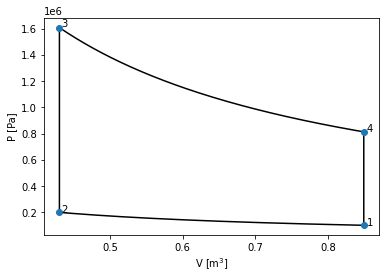

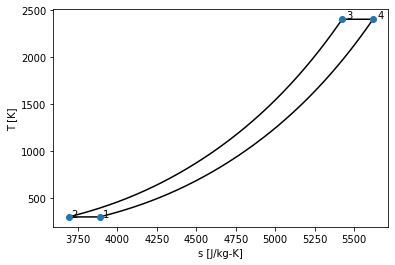

In [4]:
# PV diagram points:
plt.plot(V_cycle, P_cycle, '-', color='black')
V_vec = [V_1, V_2, V_3, V_4]
P_vec = [P_1, P_2, P_3, P_4]
plt.plot(V_vec, P_vec, 'o')
i = 0
for V, P in zip(V_vec, P_vec):
  i += 1
  plt.annotate(f'{i}', (V*1.005, P*1.005))
plt.xlabel('V [m$^3$]')
plt.ylabel('P [Pa]')
plt.show()

# TS diagram points:
plt.plot(s_cycle, T_cycle, '-', color='black')
T_vec = [T_1, T_2, T_3, T_4]
s_vec = [s_1, s_2, s_3, s_4]
plt.plot(s_vec, T_vec, 'o')
i = 0
for s, T in zip(s_vec, T_vec):
  i += 1
  plt.annotate(f'{i}', (s*1.005, T*1.005))
plt.xlabel('s [J/kg-K]')
plt.ylabel('T [K]')
plt.show()

In [5]:
# First and second law!: (du = dq - dw and ds = dq/T)
# 1->2: Isothermal compression (w_12 = q_12 - u_12 and q_12 = T_L*(s_2 - s_1))
q_12 = T_L * (s_2 - s_1)
w_12 = q_12 - (u_2 - u_1)
# 2->3: Isochoric heating (w_23 = 0, q_23 = u_3 - u_2)
w_23 = 0
q_23 = u_3 - u_2
# 3->4: Isothermal expansion (w_34 = q_34 - u_34 and q_34 = T_H*(s_4 - s_3))
q_34 = T_H * (s_4 - s_3)
w_34 = q_34
# 4->1: Isochoric cooling (w_41 = 0 and q_41 = u_1 - u_4)
w_41 = 0
q_41 = u_1 - u_4

w_net = w_12 + w_23 + w_34 + w_41
print(f'w_net={w_net:.4g} J/kg')

w_net=4.12e+05 J/kg


## Question 3:

What is the required thermal energy input for each cycle? (i.e. compute $Q_{in} = Q^{2\rightarrow3}+Q^{3\rightarrow4}$)

There are actually two ways of carrying out the Stirling Cycle. Notice that $Q^{4\rightarrow1}$ is almost equal in magnitude but opposite sign of $Q^{2\rightarrow3}$, and thus by using a process called "regeneration", we can recover $Q^{2\rightarrow3}$ almost entirely. In this case:

$Q_{in}=Q^{2\rightarrow3} + Q^{3\rightarrow4} - |Q^{4\rightarrow1}|$. 

We will do the analysis with both methods to see the difference:

In [6]:
# Insert code here:
q_in = q_23 + q_34
q_in_regen = q_23 + q_34 + q_41 # Assume we can perfectly recover the heat from the isochoric cooling (q_41 = -q_23)
print(f'q_in={q_in:.4g} J/kg')
print(f'q_in_regen={q_in_regen:.4g} J/kg')

q_in=2.33e+06 J/kg
q_in_regen=4.708e+05 J/kg


## Question 4:

How do your answers to Questions 2 and 3 change with with $P_2$? (i.e. plot $W_{net}$ and $Q_{in}$ as a function of $P_2$)

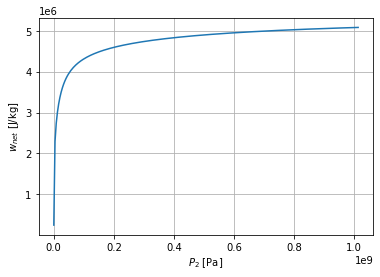

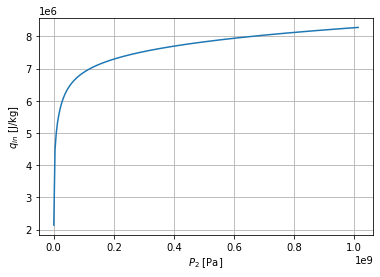

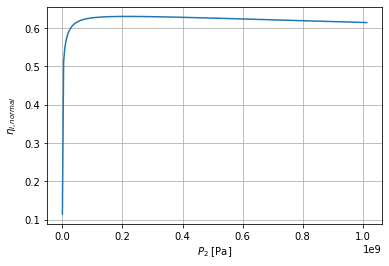

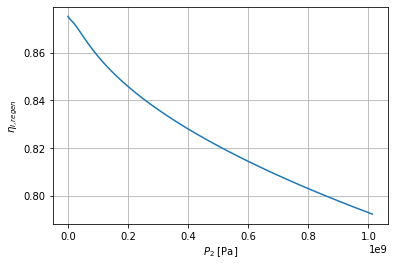

In [7]:
# Insert code here:
def simulate(P_2):
  # State 1:
  T_1 = T_L
  Air.update(cp.PT_INPUTS, P_1, T_1)
  # Compute other state variables like so:
  V_1 = m_air / Air.rhomass() # m^3
  s_1 = Air.smass() # J/kg-K
  h_1 = Air.hmass() # J/kg
  u_1 = Air.umass() # J/kg

  # Compute the properties for the other states and W_net:
  T_2 = T_L
  Air.update(cp.PT_INPUTS, P_2, T_2)
  V_2 = m_air / Air.rhomass() # m^3
  s_2 = Air.smass() # J/kg-K
  h_2 = Air.hmass() # J/kg
  u_2 = Air.umass() # J/kg

  T_3 = T_H
  Air.update(cp.DmassT_INPUTS, m_air/V_2, T_3)
  V_3 = m_air / Air.rhomass() # m^3
  s_3 = Air.smass() # J/kg-K
  h_3 = Air.hmass() # J/kg
  P_3 = Air.p() # Pa
  u_3 = Air.umass() # J/kg

  T_4 = T_H
  Air.update(cp.DmassT_INPUTS, m_air/V_1, T_4)
  V_4 = m_air / Air.rhomass() # m^3
  s_4 = Air.smass() # J/kg-K
  h_4 = Air.hmass() # J/kg
  P_4 = Air.p() # Pa
  u_4 = Air.umass() # J/kg

  # First and second law!: (du = dq - dw and ds = dq/T)
  # 1->2: Isothermal compression (w_12 = q_12 - u_12 and q_12 = T_L*(s_2 - s_1))
  q_12 = T_L * (s_2 - s_1)
  w_12 = q_12 - (u_2 - u_1)
  # 2->3: Isochoric heating (w_23 = 0, q_23 = u_3 - u_2)
  w_23 = 0
  q_23 = u_3 - u_2
  # 3->4: Isothermal expansion (w_34 = q_34 - u_34 and q_34 = T_H*(s_4 - s_3))
  q_34 = T_H * (s_4 - s_3)
  w_34 = q_34
  # 4->1: Isochoric cooling (w_41 = 0 and q_41 = u_1 - u_4)
  w_41 = 0
  q_41 = u_1 - u_4

  return(w_12 + w_23 + w_34 + w_41, q_23 + q_34, q_23 + q_34 + q_41)

w_net_vec = []
q_in_vec = []
eta_I_vec = []
eta_I_regen_vec = []
P_2_vec = np.linspace(1.5*P_1, 10000*P_1, 250)
for P in P_2_vec:
  w_net_i, q_in_i, q_in_i_regen = simulate(P)
  w_net_vec.append(w_net_i)
  q_in_vec.append(q_in_i)
  eta_I_vec.append(w_net_i/q_in_i)
  eta_I_regen_vec.append(w_net_i/q_in_i_regen)

plt.plot(P_2_vec, w_net_vec)
plt.xlabel('$P_2$ [Pa]')
plt.ylabel('$w_{net}$ [J/kg]')
plt.grid()
plt.show()

plt.plot(P_2_vec, q_in_vec)
plt.xlabel('$P_2$ [Pa]')
plt.ylabel('$q_{in}$ [J/kg]')
plt.grid()
plt.show()

plt.plot(P_2_vec, eta_I_vec)
plt.xlabel('$P_2$ [Pa]')
plt.ylabel('$\eta_{I, normal}$')
plt.grid()
plt.show()

plt.plot(P_2_vec, eta_I_regen_vec)
plt.xlabel('$P_2$ [Pa]')
plt.ylabel('$\eta_{I, regen}$')
plt.grid()
plt.show()

We can see here that at low pressures, we approach the Carnot efficiency using regen!

## Question 5

What is the first law efficiency of the ideal Stirling Cycke? (i.e. compute $\eta_I = W_{net}/Q_{in}$). How does it compare to the Carnot efficiency?

In [8]:
# Insert code here:
eta_I_normal = w_net / q_in
eta_I_regen = w_net / q_in_regen
eta_c = 1 - T_L/T_H
print(f'eta_I_normal={eta_I_normal:.2g}')
print(f'eta_I_regen={eta_I_regen:.2g}')
print(f'eta_c={eta_c:.2g}')

eta_I_normal=0.18
eta_I_regen=0.88
eta_c=0.88


## Question 6

What is the carbon intensity of the Stirling Cycle? (*Hint: final answer should be in units of kg CO2/J of net work*)

$I = \frac{8 M_{CO_2} / M_{C_8H_{18}} \textrm{ [kg CO2 / kg C8H18]}}{h_{rxn}\textrm{ [J/kg C8H18]} * \eta_I}$

In [9]:
# Insert code here:
I_normal = kg_CO2_per_kg_gas/h_rxn/eta_I_normal # kgCO2/J
I_regen = kg_CO2_per_kg_gas/h_rxn/eta_I_regen # kgCO2/J
print(f'I_normal={I_normal:.3g} kgCO2/J')
print(f'I_regen={I_regen:.3g} kgCO2/J')

I_normal=3.86e-07 kgCO2/J
I_regen=7.81e-08 kgCO2/J


## Question 7

Roughly how much CO$_2$ would be emitted annually if all of the world's power needs were met by this process?

In [10]:
# Insert code here:
E_per_year = 8.28e19 # J (assumes just electricity demand)
kg_CO2_per_year_normal = E_per_year * I_normal
kg_CO2_per_year_regen = E_per_year * I_regen
print(f'Total CO2 produced each year using this process: {kg_CO2_per_year_normal*1e-12:.3g} Gt ({kg_CO2_per_year_regen*1e-12:.3g} Gt with regen)')

Total CO2 produced each year using this process: 32 Gt (6.46 Gt with regen)


In reality, the global energy-related carbon emissions are closer to [30 Gt/yr](https://www.iea.org/articles/global-energy-review-co2-emissions-in-2020). So interestingly, with regen, switching engines out for Stirling Cycle engines could reduce CO$_2$ emissions; *however*, in practice it is very difficult to achieve such high efficiencies as reported here. This endeavor would also be very expensive and would not eliminate carbon emissions - which we must do soon to abate climate change - so in all, I personally would not recommend it.